In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
x=data.drop(['Outcome'],axis=1)
y=data['Outcome']

In [8]:
print(x.shape)
print(y.shape)

(768, 8)
(768,)


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [52]:
model=keras.Sequential([
                        keras.layers.Dense(8,input_shape=[8]),
                        keras.layers.Dense(55,activation='relu'),
                        keras.layers.Dense(55,activation='relu'),
                        keras.layers.Dense(45,activation='relu'),
                        keras.layers.Dense(45,activation='relu'),
                        keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history=model.fit(x_train, y_train, epochs=100)

Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 2.5220 - accuracy: 0.4630
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7286 - accuracy: 0.5859
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6190 - accuracy: 0.6874
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6067 - accuracy: 0.6875
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.6928
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6033 - accuracy: 0.6826
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6092 - accuracy: 0.6744
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5615 - accuracy: 0.7471
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5762 - accuracy: 0.7126
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5727 - accuracy: 0.7289
Epoch 11/

In [53]:
model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.6831 - accuracy: 0.7338


[0.6830943822860718, 0.7337662577629089]

In [54]:
yp=model.predict(x_test)
yp[:4]

array([[0.40944442],
       [0.17786998],
       [0.29462373],
       [0.10484809]], dtype=float32)

In [64]:
y_pred = []
for element in yp:
    if element > 0.55:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [65]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.7402597402597403


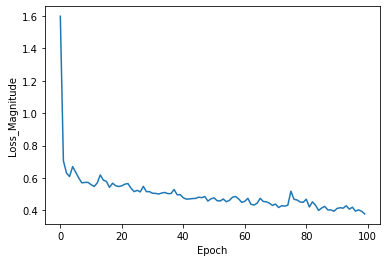

In [66]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch')
plt.ylabel('Loss_Magnitude')
plt.plot(history.history['loss'])